Problem 1

We are controlling a rocket car, and we want to pass the origin with positive velocity as soon as possible. The optimisation problem is 
$$
\min t_f \ subj. \begin{cases}
\ddot y = u, \ \vert u \vert \leq 1, \ t_f \geq 0, \\
y(0) = \alpha, \ y(t_f) = 0, \\
\dot y (0) = \beta, \ \dot y (t_f) \geq 0.
\end{cases}
$$

(a) What are the possible optimal switching sequences?

If $\alpha > 0$, we will first have to 'reverse' to the origin. We reach some $y> 0$, $\dot y < 0$ such that we should begin accelerating. It is possible that the optimal solution is to overshoot the origin a bit.

If $\alpha < 0$, the optimal policy is trivially to step on the gas, i.e $u = 1$.

(b) Sketch the optimal solution in a phase plane plot.

Since I am not certain about whether we should overshoot the origin or not, we should attempt to find a PMP solution before sketching. Put 
$$
x = [y, \dot y]^T \rightarrow \dot x = [\dot y , u]^T.
$$
Inspired by the Dubin's car example, we write
$$
t_f = \int_0^{t_f}dt \rightarrow f_0 = 1.
$$
Thus, we obtain the Hamiltonian 
$$
H = 1 + \lambda_1 \dot y + \lambda_2 u.
$$
Due to the constraint $\vert u \vert \leq 1 $, we must have that $u^* = -sign(\lambda_2)$. The ODE's for $\lambda$ are 
$$
\dot \lambda_1 = -H_{y} = 0 \rightarrow \lambda_1 = a,
$$
and 
$$
\dot \lambda_2  = -H_{\dot y} = -\lambda_1 \rightarrow \lambda_2 = b -at.
$$
Now that we know that $u*$ will at most switch once, we can probably solve for $a$, $b$. Observe a scenario where $y(0) = \alpha > 0$, $\dot y(0)  = \beta$. Assume that currently $u^* = -1$, and that the switching time is $T$. Then
$$
\dot y(t_f) = \beta -T + (t_f - T), \ y(t_f) = \alpha + \int_0^{t_f}dt \dot y = \alpha + \beta t_f - \frac{1}{2}T^2 + \frac{(t_f - T)^2}{2}= 0
$$
If we put $T=0$, i.e assume that we are right at the switch-point at genesis, we can solve for $\alpha$, $\beta$ and thus obtain a curve for our phase space plot. We get 
$$
\dot y = \beta  + t_f \geq 0, \ y  =\alpha +\beta t_f +\frac{1}{2}t_f^2 = 0.
$$
We see that we must have $\beta < 0$ for this to make sense. Since we by assumption do not switch $u$ again, we must have that $-\beta = t_f$. Then, 
$$
y(t_f) = \alpha - \beta^2 + \frac{1}{2}\beta^2 = 0 \rightarrow \alpha = \frac{1}{2}\beta^2.
$$
Note that this is only the solution in the quadrant $\alpha > 0$, $\beta < 0$. For $\alpha > 0$, $\beta > 0$ we must have $u = -1$. For $\alpha < 0 $, we trivially have $u = 1$. 

To plot this, we define some helper functions: 


In [54]:
import matplotlib.pyplot as plt
import numpy as np


def f(x, y):
    if x < 0 or (x <= 0.5 * (y ** 2) and y < 0):
        return y, 1
    return y, -1


def switch_line(x):
    return 0.5 * (x ** 2)


def plot_phase_diagram():
    x_range = np.arange(-10, 10, 1)
    y_range = np.arange(-10, 10, 1)
    scale = 0.1
    for x in x_range:
        for y in y_range:
            dx, dy = f(x, y)
            plt.arrow(x, y, dx * scale, dy * scale, length_includes_head=True, head_width=0.2)
    y_range_sep_line = np.arange(-4.2, 0, 0.1)
    plt.plot(switch_line(y_range_sep_line), y_range_sep_line, label="Switch line", color="red")
    plt.plot([0, 0], [0, 9], color="red")
    plt.text(5, 4.5, "u = -1", color="red", fontsize=18, fontweight="extra bold")
    plt.text(-5, -4.5, "u = 1", color="red", fontsize=18, fontweight="extra bold")
    plt.xlabel("y")
    plt.ylabel(r"$\dot y$")
    plt.legend()


Now we can plot the phase-space diagram: 

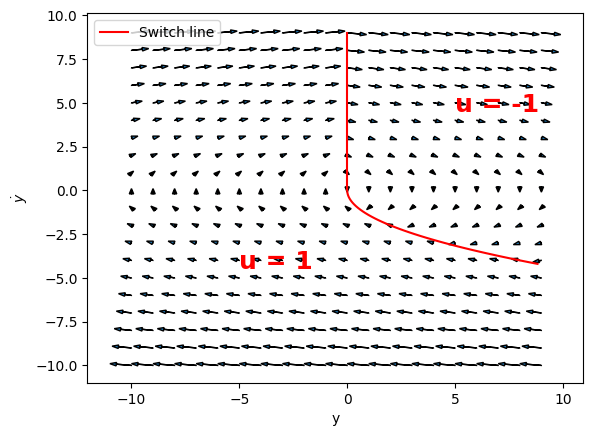

In [55]:
plot_phase_diagram()

Problem 2

A lifeguard is standing at $p = (0,0)$, and needs to save a person at $q = (a,b)$. The dynamics for the lifeguard are 
$$
\begin{bmatrix}  \dot x \\ \dot y  \end{bmatrix} = \begin{bmatrix}  v(y) \cos (u(t)) \\ v(y) sin(u(t)) \end{bmatrix},
$$
with $\bar x(0) = p$, $\bar x(t_f) = q$. The speed of the lifeguard $v(y)$ depends on the distance from the beach 
$$
v(y) = \begin{cases}1, \ 0 \leq y \leq b/2, 
\\
1/2, \ b/2 < y \leq b.
\end{cases}
$$
We need to find the fastest route to the person in need. There is some point $r = (x, b/2)$ where the lifeguard passes the half-way point. Then, the optimal route is $\gamma = c_1 \cup c_2$, where $c_1 \in \Omega_{p,r}$ and $c_2 \in \Omega_{r, q}$. Observe the case where we pass the half-way point at an arbitrary $r$. The fastest route is along a straight line (technically a geodesic), i.e 
$$
c_2 \vert_r =  [x  + \frac{1}{2}t \cos(\theta^*), (b/2)  + \frac{1}{2}t \sin(\theta^*)]^T.
$$
We know that the speed is $\vert \dot x \vert = 1/2$, and the distance is $L(c_2) = \sqrt{(b/2)^2+ (a -x)^2}$. The distance $p \rightarrow r$ is $L(c_1) = \sqrt{(b/2)^2+ (x)^2}$, with velocity $\vert \dot x \vert = 1$. We see that both distances are functions of the crossing $x$-coordinate, and there are constant speeds in both areas. Thus, we can minimise the total time 
$$
T = \frac{L(c_1)}{ 1} + \frac{L(c_2)}{(1/2)}
$$
with regards to $x$. What we have done here is essentially a dynamic programming solution, though we used geometric considerations to argue that the optimal solution must be two straight lines.

Put $b = 4$ and $a = 2$. Then 
$$
T(x) = 2\sqrt{4 + (x-2)^2} + \sqrt{4 + x^2}.
$$
We solve this with SciPy, because we are lazy men:

In [56]:
import scipy.optimize as opt


def f(x):
    return 2 * np.sqrt(4 + (x - 2) ** 2) + np.sqrt(4 + x ** 2)


result = opt.minimize(f, x0=0)
print(f"Crossing point x-coordinate: {result.x}")
print(f"Terminal time T: {result.fun} seconds")


Crossing point x-coordinate: [1.40106074]
Terminal time T: 6.61743306742512 seconds


Problem 3

We want to solve the "Mission To Mars" problem from Page 71 in the Exercise Notes. This problem is found at the end of this notebook, as it involves translating a ton of stuff from Matlab.

Problem 4

Now we want to determine the bang-bang control for the optimisation problem
$$
\min T \ subj. \begin{cases}
\dot x = x^2 - \frac{1}{4} - x u, \\
x(0) = 1/2, x(T) = -1/2 \\
\vert u \vert \leq 1.
\end{cases}
$$
We observe $T = \int_0^T dt \rightarrow f_0 = 1$Then, the Hamiltonian is 
$$
H = 1 + \lambda(x^2 - \frac{1}{4} - x u) = 1 + \lambda(x^2 - \frac{1}{4}) - \lambda x u .
$$
The bang-bang control minimising $H$ is $u = sign(\lambda x )$. The equation for $\lambda$ is 
$$
\dot \lambda = -H_x = - \lambda(2x - u).
$$
We are given the hint that the solution to an ODE $\dot \lambda = f(t) \lambda$ has constant sign. Thus, the signal $u(t)$ switches sign precisely when $x$ does. It is obvious that $u(0) = 1$. We compute the switching time numerically:

Text(1.24, 0.05, 'Switch time: 1.24s')

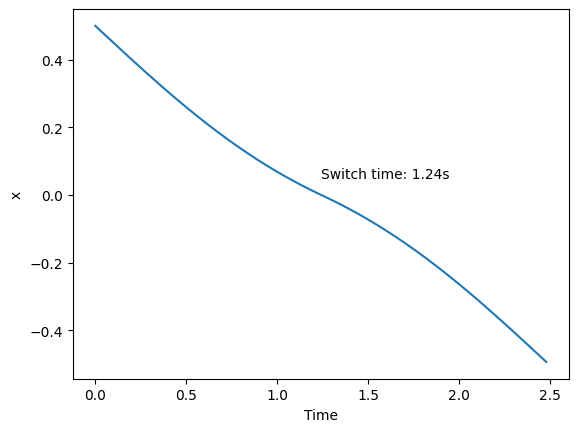

In [79]:
def dx(x):
    u = 1 if x > 0 else -1
    return x ** 2 - 1 / 4 - x * u


times = [0]
dt = 0.01
epsilon = 0.01
x = 1 / 2
xs = [x]
N_max = 1000
for k in range(N_max):
    x += dt * dx(x)
    times.append((k + 1) * dt)
    xs.append(x)
    if np.abs(x + 1 / 2) < epsilon:
        break
plt.plot(times, xs)
plt.xlabel("Time")
plt.ylabel("x")

x_abs = np.abs(xs)
switch_i = x_abs.argmin()
switch_time = switch_i * dt
plt.text(switch_time, 0.05, f"Switch time: {switch_time}s")


Problem 3


First, we translate some stuff from Matlab. The translation is 'verbatim' in the sense that I did not put any effort into making it more Pythonic. One notable difference is that I just used SciPy's root rather than the manually implemented version in the Matlab code.

The scipy.optimise.root is not a Newtons method solver. However, I struggled for hours trying to get the optimise.newton function to converge. Thus, I hope that .root is acceptable.


In [205]:
# Problem specific constants

c1 = 0.1405
c2 = 0.533
c3 = 3.32
ti = 0
tf = 1
x_0 = np.array([1, 0, 1])

# Starting guess

lambda_0 = np.array([-1, -1, -1])

# Number of embeddings

Num_embed = 10


In [253]:
import scipy.integrate as inte


def fh(t, x):
    x1, x2, x3 = x[0], x[1], x[2]
    l1, l2, l3 = x[3], x[4], x[5]

    norm = np.sqrt(l2 ** 2 + (c3 * l3) ** 2)

    if norm != 0:
        (sinu,
         cosu) = (-l2 / norm,
                  -c3 * l3 / norm)
    else:
        (sinu,
         cosu) = (0,
                  1)

    mt = 1 / c1 - c2 * c3 * t

    xplp = [
        (c3 ** 2) * x2,  #x1dot
        ((x3 ** 2) / x1) - (1 / (x1 ** 2)) + sinu / mt,  # x2dot
        - ((c3 ** 2) * x2 * x3 / x1) + c3 * cosu / mt,  # x3dot

        -(l2 * (2 / (x1 ** 3) - (x3 ** 2) / (x1 ** 2)) + l3 * (c3 ** 2) * x2 * x3 / (x1 ** 2)),
        -(l1 * (c3 ** 2) - l3 * ((c3 ** 2) * x3 / x1)),
        -(l2 * (2 * x3 / x1) - l3 * ((c3 ** 2) * x2 / 1))

    ]
    return np.array(xplp)


def theta(l0):
    initial_state = np.concatenate((x_0, l0))
    integral_results = inte.solve_ivp(fh, t_span=(ti, tf), y0=initial_state)
    t = integral_results.t
    z = integral_results.y
    xT = z[:, -1]
    #print(t)
    theta = [
        xT[1],
        xT[2] - (1 / np.sqrt(xT[0])),
        (xT[3] + 1) - 0.5 * (1 / (xT[0] ** (3 / 2))) * xT[5]
    ]
    return np.array(theta)


def newton_solver(f, m, x_guess):
    local_func = lambda l: f(l) - m
    #print(local_func(x_guess), m)
    result = opt.root(local_func, x0=x_guess, tol=0.01)
    return result.x


def plot_results(t, trajectory):
    r = trajectory[0, :]
    x2 = trajectory[1, :]
    vt = trajectory[2, :]
    l1 = trajectory[3, :]
    l2 = trajectory[4, :]
    l3 = trajectory[5, :]

    fip = vt / r

    dt = np.concatenate((np.array([0]), np.diff(t)))
    dfi = dt * fip
    fi = dfi.cumsum()
    fi = c3 * fi

    norms = np.sqrt(l2 * l2 + (c3 * l3) * (c3 * l3))

    sig_sin = -l2 / norms
    sig_cos = -c3 * l3 / norms

    traj_x = r * np.cos(fi)
    traj_y = r * np.sin(fi)

    plt.plot(traj_x, traj_y, label="Trajectory")

    angles = np.arange(0, 2 * np.pi + 0.1, 0.1)

    plt.plot(r[0] * np.cos(angles), r[0] * np.sin(angles), label="Initial orbit")
    plt.plot(r[-1] * np.cos(angles), r[-1] * np.sin(angles), label="Terminal orbit")

    plt.scatter([0], [0], label="Origin", color="black")

    u = np.arctan2(sig_sin, sig_cos)
    v = 0.1

    vel_sin = v*np.sin(fi + np.pi / 2 - u)
    vel_cos = v*np.cos(fi + np.pi / 2 - u)
    for i in range(len(vel_sin)):
        plt.arrow(traj_x[i], traj_y[i], vel_cos[i],vel_sin[i], length_includes_head = True)

    print(f"Final radius: {r[-1]}")
    plt.legend()
    plt.figure()

    plt.plot(t, sig_sin, label="Sine Signal")
    plt.plot(t, sig_cos, label="Cosine Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()


The problem is as follows: We want to transfer orbits. We control a thrust direction $u(t)$. We have a fixed terminal time, and we want to transfer so that the radius of the final orbit is maximised. We have the variables:
$\xi_1 = $ The radial distance of the spacecraft from the attracting centre.
$\xi_2 = $ The radial component of velocity.
$\xi_3 = $ Tangential component of velocity.
$m_0 =$ Initial mass of the rocket.
$\vert \dot m \vert = $ Fuel consumption rate (constant).
$\mu=$ Gravitational constant.

We scale $x_1 = \xi_1(t)/\xi_1(0)$, $x_2 = \xi_2(t)/(\mu t_f / \xi_1^2(0))$, $x_3 = \xi_3(t)/\sqrt{\mu/\xi_1(0)}$, and use the scaled time $t = \tau t_f$, $t \in [0,1]$. The equations of motion become
$$
\begin{split}
\dot x_1 = c_3^2 x_2, \\ 
\dot x_2 = \frac{x_3^2}{x_1} - \frac{1}{x_1^2}+\frac{\sin u}{1/c_1 - c_2 c_3 t},\\
\dot x_3 = -\frac{c_3^2 x_2 x_3}{x_1} + \frac{c_3 \cos(u)}{1/c_1 - c_2 c_3 t }.
\end{split}
$$
We omit typing out the formulas for the constants $c_i$, as we are given numerical values $c_1 = 0.1405$, $c_2 = 0.533$ and $c_3 = 3.32$. The terminal (and initial) condition is radial speed zero, and balance between centrifugal and gravitational force. Thus, 
$$
S_f = \{ x \in R^3: x_2 = 0, \ x_3 - \frac{1}{\sqrt{x_1}} = 0\}.
$$
The optimisation problem is 
$$
\min \phi(x(1)) = -x_1(1) \ subj. 
\begin{cases}
\dot x = f(\dots), \\
x(0) = [1, 0, 1]^T \\
x(1) \in S_f
\end{cases}
$$


The Hamiltonian is (Did not write the whole thing out because of fiddly expression)
$$
H = \lambda^T f(\dots).
$$
We have that 
$$
\begin{split}
\dot \lambda_1 = -\Big( \lambda_2 \big( - \frac{x_3^2}{x_1^2}+ 2 \frac{1}{x_1^3} \big) + \lambda_3\big(  \frac{c_3^2 x_2 x_3}{x_1^2}\big)\Big), \\
\dot \lambda_2 = - \Big( \lambda_1(c_3^2)  + \lambda_3\big(  -\frac{c_3^2 x_3}{x_1}\big) \Big), \\
\dot \lambda_3 = - \Big(\lambda_2 \big( 2 \frac{x_3}{x_1} \big) + \lambda_3 \big( -\frac{c_3^2 x_2}{x_1} \big) \Big)
\end{split}
$$
Next, we differentiate the functions defining the manifold $S_f$: 
$$
\nabla S_f = \begin{bmatrix}
 0 & 1 & 0 
\\ \frac{1}{2x_1^{3/2}} & 0 & 1\end{bmatrix} = \begin{bmatrix}
 \nabla g_1^T
\\ \nabla g_2^T\end{bmatrix}
$$
We want to solve 
$$
\nabla S_f (z) = 0 \rightarrow z = [1, 0, -\frac{1}{2x_1^{3/2}}]^T.
$$
Since $\lambda - \nabla \phi = a \nabla g_1 + b \nabla g_2$
$$
z \cdot (\lambda - \nabla \phi)  = (\lambda_1 + 1) + \lambda_3(-\frac{1}{2x_1^{3/2}}) = 0.
$$

In [249]:
m_0 = theta(lambda_0)
lambda_k = lambda_0
for k in range(1, Num_embed + 1):
    iteration = k
    m_k = (1 - k / Num_embed) * m_0
    lambda_k = newton_solver(theta, m_k, lambda_k)
print(f"Final results: \n Lambda: {lambda_k}, \n Theta(lambda): {theta(lambda_k)}")

Final results: 
 Lambda: [-1.88669159 -3.11900434 -2.03419889], 
 Theta(lambda): [-1.96678108e-04 -2.46270838e-05 -3.33556112e-04]


Now we can plot the resulting trajectory:

Final radius: 1.5137725018529278


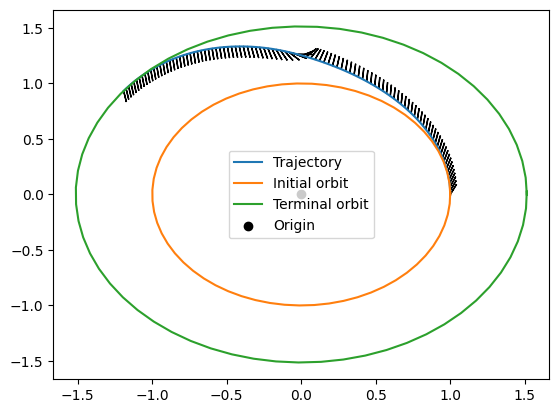

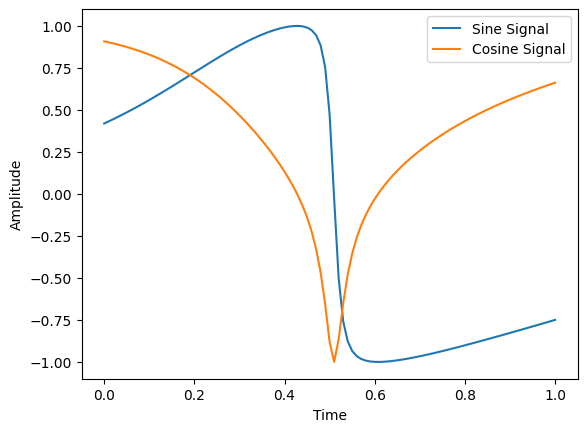

In [254]:
cool_init = np.concatenate((x_0, lambda_k))
coolio = inte.solve_ivp(fh, t_span=(ti, tf), y0=cool_init, max_step=0.01)
plot_results(coolio.t, coolio.y)